# Module 02: A Box Model of Land-Atmosphere Carbon Balance

### 1. Introduction


In [1]:
import numpy as np
import matplotlib.pyplot as plt

#M1i = initial atmosphere carbon mass
M1i = 1100.0
#M2i = initial biosphere carbon mass
M2i = 300.0

#k12 = amount of carbon flux (residence time) from the atmosphere to biosphere - photosynthesis
k12 = 0.075 
#k21 = amount of carbon flux (residence times) from the biosphere to the atmosphere
k21 = 0.1

ti = 0.0 #initial time
tf = 20.0 #final time step
dt = 0.5#step size


In [2]:
t = np.arange(ti,tf+dt,dt) #time intervals

Nt = t.size #number of time elements on x-axis

print('t has '+str(Nt)+' time steps')

t has 41 time steps


In [3]:
M1 = np.zeros((Nt,)) #returns the array filled with zeros
M2 = np.zeros((Nt,))

In [4]:
for i in np.arange(Nt): #for loop to apply 'k' steps to the initial carbon concentation over 21 time steps
    if (i==0):
# Sets initial concentrations, from the np.zeros function
        M1[i] = M1i
        M2[i] = M2i
#applies the mass balance function over 21 time steps
    else:
        dM1dt = k21*M2[i-1] - k12*M1[i-1]
        dM2dt = k12*M1[i-1] - k21*M2[i-1]
#creates the integrated function    
        M1[i] = M1[i-1] + dM1dt*dt
        M2[i] = M2[i-1] + dM2dt*dt


In [5]:
M1_anlt = (k21*(M1i+M2i))/(k12+k21) + (k12*M1i - k21*M2i)/(k12+k21)*np.exp(-(k12+k21)*t) #plots the analytical solution for the atmosphere flux. Approximate solution
M2_anlt = (k12*(M1i+M2i))/(k12+k21) - (k12*M1i - k21*M2i)/(k12+k21)*np.exp(-(k12+k21)*t) #plots the analytical solution  for the biosphere flux. Approximate solution.

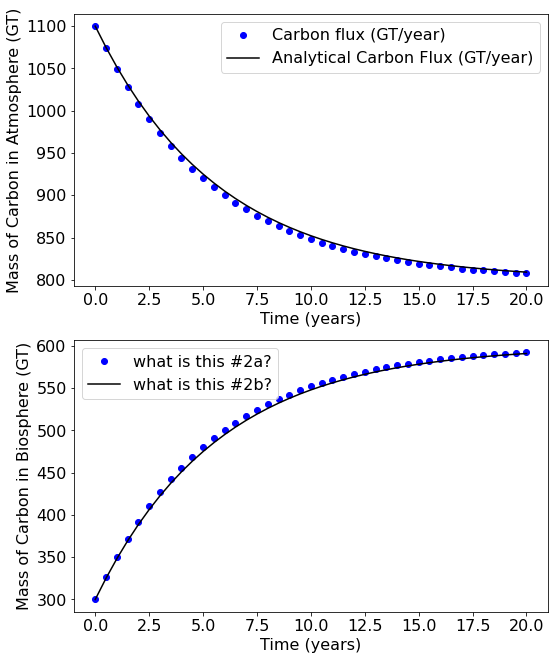

In [6]:
plt.figure(figsize=(8.5,11))
plt.rcParams.update({'font.size': 16})
plt.title('What is this?')

plt.subplot(2,1,1)
plt.plot(t,M1,'bo', label='Carbon flux (GT/year)')
plt.plot(t,M1_anlt,'k-', label='Analytical Carbon Flux (GT/year)')
plt.xlabel('Time (years)')
plt.ylabel('Mass of Carbon in Atmosphere (GT)')
plt.legend()

plt.subplot(2,1,2)
plt.plot(t,M2,'bo', label='what is this #2a?')
plt.plot(t,M2_anlt,'k-', label='what is this #2b?')
plt.xlabel('Time (years)')
plt.ylabel('Mass of Carbon in Biosphere (GT)')
plt.legend()
